# Вариант 7

Найти все интервалы (по количеству слов) между словами «я»
в повести Ф. М. Достоевского [«Бедные люди»](https://ilibrary.ru/text/17/p.1/index.html). 
Аппроксимировать пуассоновским (poisson), геометрическим (geom), 
логарифмическим (logser) распределением.

Вывести вероятности для полученных аппроксимаций вместе с гистограммой, 
посчитать среднее значение логарифмической функции правдоподобия.

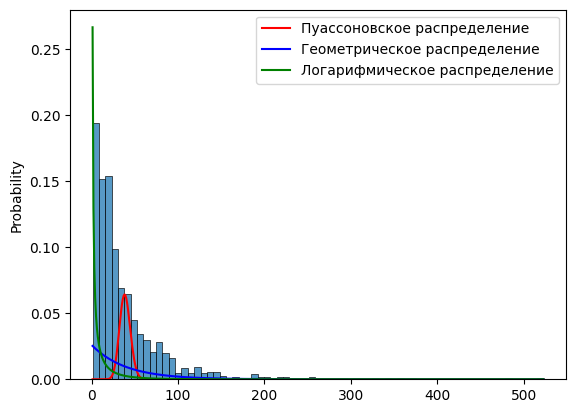

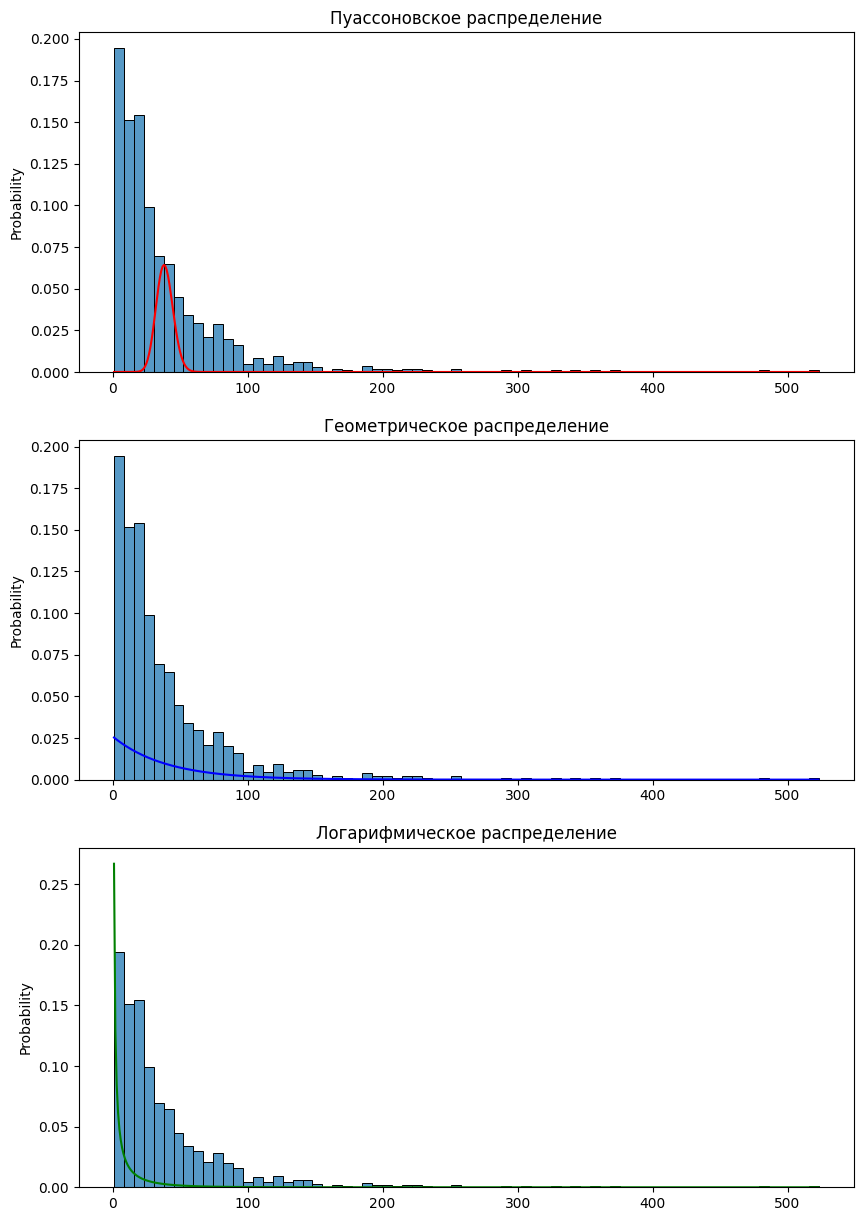

Средние значения логарифмической функции правдоподобия
Пуассоновское распределение: -22.37
Геометрическое распределение: -4.64
Логарифмическое распределение: -5.39


In [19]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import geom, logser, poisson

# Чтение текста из файла
with open("book.txt", "r", encoding="utf-8") as file:
    text = file.read()

# Разделение текста на слова
words = text.split()

# Нахождение интервалов между словами "я"
intervals = []
last_index = -1

for i, word in enumerate(words):
    if word.lower() == "я":
        if last_index != -1:
            intervals.append(i - last_index - 1)
        last_index = i

# Преобразование интервалов в numpy массив
intervals = np.array(intervals)

# Аппроксимация пуассоновским распределением
lambda_poisson = np.mean(intervals)
poisson_dist = poisson(mu=lambda_poisson)

# Аппроксимация геометрическим распределением
p_geom = 1 / (np.mean(intervals) + 1)
geom_dist = geom(p=p_geom)

# Аппроксимация логарифмическим распределением
p_logser = 1 - (1 / np.mean(intervals))
logser_dist = logser(p=p_logser)

sns.histplot(intervals, stat="probability")
plt.plot(
    np.arange(1, max(intervals) + 1),
    poisson_dist.pmf(np.arange(1, max(intervals) + 1)),
    "r-",
    label="Пуассоновское распределение",
)
plt.plot(
    np.arange(1, max(intervals) + 1),
    geom_dist.pmf(np.arange(1, max(intervals) + 1)),
    "b-",
    label="Геометрическое распределение",
)
plt.plot(
    np.arange(1, max(intervals) + 1),
    logser_dist.pmf(np.arange(1, max(intervals) + 1)),
    "g-",
    label="Логарифмическое распределение",
)
plt.legend()
plt.show()

# На трех отдельных графиках вывести полученные распределения, а также исходную гистограмму
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

sns.histplot(intervals, stat="probability", ax=axes[0])
x = np.arange(1, max(intervals) + 1)
axes[0].plot(x, poisson_dist.pmf(x), "r-", label="Пуассоновское распределение")
axes[0].set_title("Пуассоновское распределение")

sns.histplot(intervals, stat="probability", ax=axes[1])
axes[1].plot(x, geom_dist.pmf(x), "b-", label="Геометрическое распределение")
axes[1].set_title("Геометрическое распределение")

sns.histplot(intervals, stat="probability", ax=axes[2])
axes[2].plot(x, logser_dist.pmf(x), "g-", label="Логарифмическое распределение")
axes[2].set_title("Логарифмическое распределение")

plt.show()

# Вычисление среднего значения логарифмической функции правдоподобия
log_likelihood_poisson = np.mean(poisson_dist.logpmf(intervals))
log_likelihood_geom = np.mean(geom_dist.logpmf(intervals))
log_likelihood_logser = np.mean(logser_dist.logpmf(intervals))

print("Средние значения логарифмической функции правдоподобия")
print(f"Пуассоновское распределение: {log_likelihood_poisson:.2f}")
print(f"Геометрическое распределение: {log_likelihood_geom:.2f}")
print(f"Логарифмическое распределение: {log_likelihood_logser:.2f}")